# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [251]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [213]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [214]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [215]:
# Lo dejo todo en millones de euros
import re
def normalizeValues(x):
    value=float(re.search('[+-]?([0-9]*[.])?[0-9]+', x)[0])
    if x.endswith('K'):
        value_final = value/1000
    else:
        value_final = value
    return float(value_final)

In [216]:
fifa['ValueNumeric'] = fifa['Value'].apply(normalizeValues)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


In [217]:
fifa['Position'].isnull().sum()

60

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [218]:
formula = "ValueNumeric ~ C(fifa['Preferred Foot']) + C(Position)"
model = ols(formula=formula, data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']),234.162243,1.0,7.673655,5.608990e-03
C(Position),16570.015128,26.0,20.885022,1.634952e-96
Residual,552902.860021,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [242]:
# Your conclusions here:

# Se rechaza la hipótesis nula de que las medias son iguales y hay diferenecias significativas 
# entre ellas. El valor de F en Position es un valor muy alto lo que nos dice que la diferencia
# entre grupos es mayor


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [220]:
# Your code here:

formula = "ValueNumeric ~ C(Nationality)"
model = ols(formula=formula, data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),32812.244217,163.0,6.762478,4.840477e-134
Residual,537095.118316,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [221]:
# También se rechaza la hipótesis nula y hay diferenecias significativas 
# entre las medias de las poblaciones. En este caso no sabría qué conclusiones sacar del 
# valor F

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [222]:
# Your code here:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [223]:
fifa.shape

(18207, 21)

In [224]:
fifa = fifa.dropna()

In [225]:
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [261]:
# Your code here:

Y = fifa['ValueNumeric']

X = sm.add_constant(fifa[[
    'SprintSpeed', 
    'Stamina']])

model = sm.OLS(Y, X).fit()

In [246]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Thu, 18 Jul 2019   Prob (F-statistic):          8.04e-193
Time:                        20:56:52   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      0.000      -3.456      -2.684
SprintSpeed     0.0263      0.004      7.380      0.000       0.019       0.033
Stamina         0.0604      0.003     18.349      0.000       0.054       0.067
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# El r squared es muy bajo por lo que se puede decir que el modelo no es bueno y 
# el Prob (F-statistic) es muy cercano a cero por lo que hay una relación signigicativa
# entre las variables.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [259]:
# Your code here:

Y = fifa['ValueNumeric']

X = sm.add_constant(fifa['Potential'])

model = sm.OLS(Y, X).fit()

In [260]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:39:09   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.000     -36.222     -34.656
Potential      0.5312      0.006     95.172      0.000       0.520       0.542
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# En este caso el r squared es más alto. Podemos decir que el modelo es mejor que el anterior
# pero sigue siendo malo. Además el Prob (F-statistic) es exactamente cero, por lo que 
# son totalmente dependientes las variables.


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

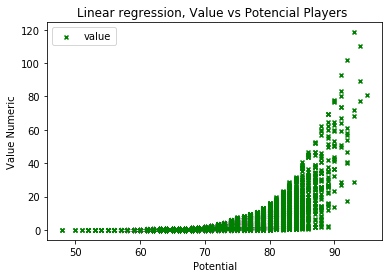

In [262]:
plt.scatter(fifa['Potential'], 
            fifa['ValueNumeric'], 
            marker='x', 
            c='g', 
            s=16,
            label='value')
plt.title('Linear regression, Value vs Potencial Players ')
plt.xlabel('Potential')
plt.ylabel('Value Numeric')
plt.legend()
plt.show()

In [ ]:
# No hay una relación lineal entre los valores pero sí hay una dependencia total